<a href="https://colab.research.google.com/github/LucasVinalsdeLuna/deeplearning-1/blob/main/Copia_de_2_1_Un_primer_vistazo_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [ ]:
#(train_images, train_labels), (test_images, test_labels) = # Descarga los datos de MNIST

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test

train_images = train_images.reshape(60000,28*28)
test_images = test_images.reshape(10000,28*28)
#Normalizmos los datos de test y de entranimento 
train_images = train_images.astype('float32') / 255
test_images  = test_images.astype('float32') / 255

In [ ]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images=train_images[50000:]
train_images=train_images[:49999]
validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]

In [ ]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

    modelo = models.Sequential()
    
    if regularizador==0:
       modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
       modelo.add(layers.Dense(10, activation='softmax'))
       modelo.summary()
    elif regularizador==1:
       modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu',
                           input_shape=(28*28,)))
       modelo.add(layers.Dense(10, activation='softmax'))
       modelo.summary()
    elif regularizador==2:
      modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu',
                           input_shape=(28*28,)))
      modelo.add(layers.Dense(10, activation='softmax'))
      modelo.summary()
    elif regularizador==3:
      modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002), activation='relu',
                           input_shape=(28*28,)))
      modelo.add(layers.Dense(10, activation='softmax'))
      modelo.summary()
    elif regularizador==4:
      modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
      modelo.add(layers.Dropout(0.5))
      modelo.add(layers.Dense(10, activation='softmax'))
      modelo.summary()
    else:
      print('Error, el valor del regulizador debe ser entre 0 y 4. \n ')
     

    return modelo

In [ ]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo

  modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo

In [ ]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

  historia0 = modelo.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data = (validation_images, validation_labels ))
  return historia0

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [ ]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network0 = compila_modelo(network0)

In [ ]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 4ms/step - loss: 0.2811 - accuracy: 0.9179 - val_loss: 0.1440 - val_accuracy: 0.9584
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1150 - accuracy: 0.9656 - val_loss: 0.1082 - val_accuracy: 0.9673
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9779 - val_loss: 0.0957 - val_accuracy: 0.9705
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0544 - accuracy: 0.9836 - val_loss: 0.0756 - val_accuracy: 0.9784
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0796 - val_accuracy: 0.9776
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0757 - val_accuracy: 0.9789
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0728 - val_accuracy: 0.9807
Epoch 

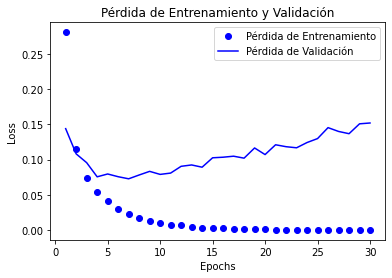

In [ ]:
pinta_perdida_entrenamiento_validacion(historia0)

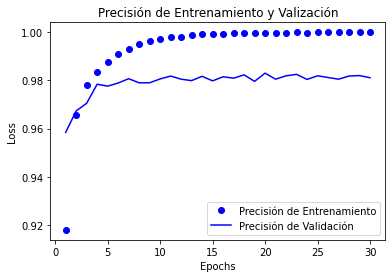

In [ ]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [ ]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1390 - accuracy: 0.8453 - val_loss: 1.1252 - val_accuracy: 0.8561
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9696 - accuracy: 0.8796 - val_loss: 0.9051 - val_accuracy: 0.8900
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8482 - accuracy: 0.9010 - val_loss: 0.7648 - val_accuracy: 0.9267
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7690 - accuracy: 0.9128 - val_loss: 0.7293 - val_accuracy: 0.9287
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7186 - accuracy: 0.9215 - val_loss: 0.6770 - val_accuracy: 0.9360
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.9282 - val_loss: 0.6379 - val_accuracy: 0.9425
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6545 - accuracy: 0.9328 - val_loss: 0.6287 - val_accuracy: 0.9397
Epoch 

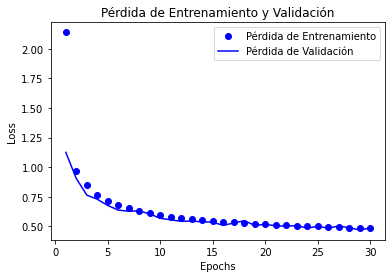

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

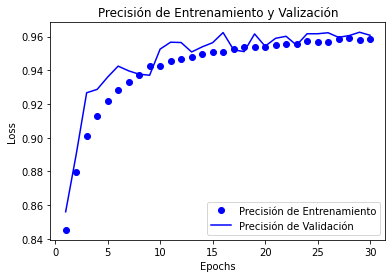

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [ ]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5282 - accuracy: 0.9124 - val_loss: 0.2919 - val_accuracy: 0.9554
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2642 - accuracy: 0.9544 - val_loss: 0.2381 - val_accuracy: 0.9575
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2097 - accuracy: 0.9631 - val_loss: 0.1954 - val_accuracy: 0.9650
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1880 - accuracy: 0.9659 - val_loss: 0.1808 - val_accuracy: 0.9698
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1732 - accuracy: 0.9698 - val_loss: 0.2450 - val_accuracy: 0.9417
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1652 - accuracy: 0.9713 - val_loss: 0.1682 - val_accuracy: 0.9694
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1570 - accuracy: 0.9728 - val_loss: 0.1723 - val_accuracy: 0.9685
Epoch 

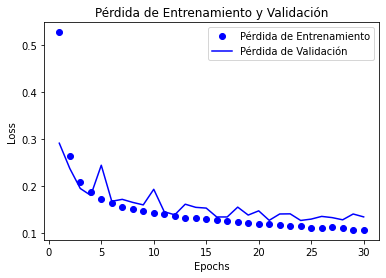

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

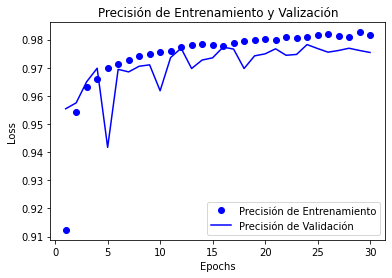

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [ ]:
network3 = crea_modelo(3)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1765 - accuracy: 0.8384 - val_loss: 1.0385 - val_accuracy: 0.8764
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9930 - accuracy: 0.8729 - val_loss: 0.8475 - val_accuracy: 0.9145
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8756 - accuracy: 0.8929 - val_loss: 0.8510 - val_accuracy: 0.9070
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8013 - accuracy: 0.9070 - val_loss: 0.7512 - val_accuracy: 0.9218
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7492 - accuracy: 0.9181 - val_loss: 0.6954 - val_accuracy: 0.9350
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7131 - accuracy: 0.9240 - val_loss: 0.6567 - val_accuracy: 0.9403
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6836 - accuracy: 0.9284 - val_loss: 0.6766 - val_accuracy: 0.9321
Epoch 

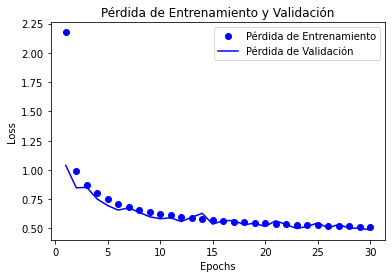

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

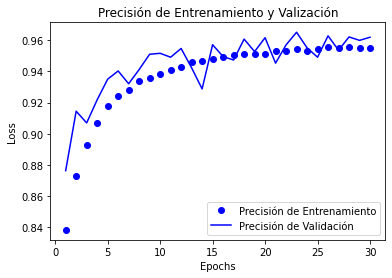

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [ ]:
network4 = crea_modelo(4)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network4 = compila_modelo(network4)

In [ ]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3413 - accuracy: 0.8987 - val_loss: 0.1663 - val_accuracy: 0.9504
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.9499 - val_loss: 0.1132 - val_accuracy: 0.9671
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1265 - accuracy: 0.9631 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1054 - accuracy: 0.9684 - val_loss: 0.0866 - val_accuracy: 0.9742
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9720 - val_loss: 0.0843 - val_accuracy: 0.9769
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.0797 - val_accuracy: 0.9778
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0737 - accuracy: 0.9776 - val_loss: 0.0819 - val_accuracy: 0.9775
Epoch 

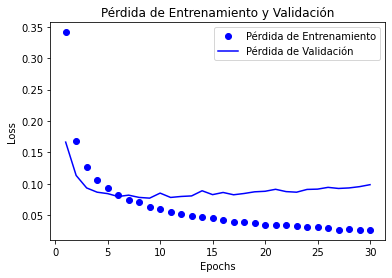

In [ ]:
pinta_perdida_entrenamiento_validacion(historia4)

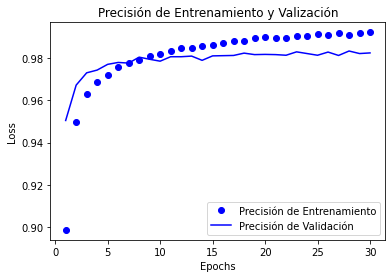

In [ ]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [ ]:
network5 = crea_modelo(5)

Error, el valor del regulizador debe ser entre 0 y 4. 
 


### CONCLUSIONES